In [2]:
## Import all the Libraries
import nltk,sys
import numpy as np,pandas as pd
import matplotlib.pyplot as plt 
import nltk.data
from nltk.stem.porter import *
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv
from nltk.stem.wordnet import WordNetLemmatizer
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from symspellpy.symspellpy import SymSpell, Verbosity  # import the module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from pprint import pprint

In [3]:
df = pd.read_csv("news_articles.csv")

In [4]:
count_vect = CountVectorizer(stop_words='english')

In [5]:
df = df.dropna()
df.count()

author                     2045
published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [6]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

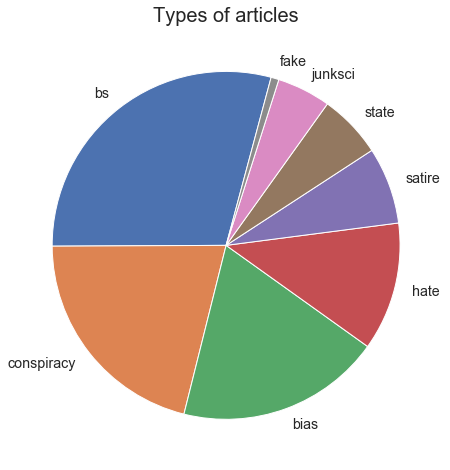

In [7]:
df['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

In [8]:
df.head(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [9]:
df.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

In [14]:
print("Number of rows present in the dataset are: ", df.shape[0])
print("Number of columns present in the dataset are: ", df.shape[1])

Number of rows present in the dataset are:  2045
Number of columns present in the dataset are:  12


### These are the 8 different types of articles:

1.bs (i.e. bullshit)
2.junksci(i.e. junk science)
3.hate
4.fake
5.conspiracy
6.bias
7.satire
8.state
